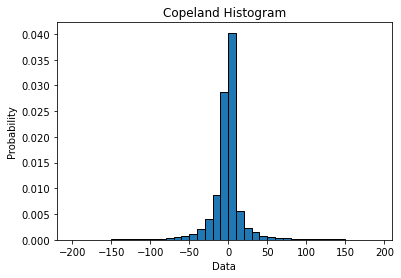

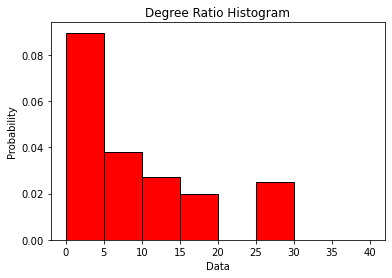

The mean of the top 100 copeland scores is: 935.27
The median of the top 100 copeland scores is: 755.00
The standard deviation of the top 100 copeland scores is: 533.83


In [64]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#creating the graph by reading the edgelist automatically adds all nodes
G = nx.read_edgelist('twitter_combined.txt', create_using=nx.DiGraph(), nodetype=int)

#functions for indegree and outdegree, creates lists for each
inDegreeVal=list(G.in_degree())
outDegreeVal=list(G.out_degree())

#copeland score
i=0
copelandList=list()
while i<=len(inDegreeVal)-1:
        z=inDegreeVal[i][1]-outDegreeVal[i][1]
        copelandList.append(z)
        i+=1
        
#degree ratios
i=0
degreeRatioList=list()
while i<=len(inDegreeVal)-1:
        z=(outDegreeVal[1][1]+1)/(inDegreeVal[i][1]+1)
        degreeRatioList.append(z)
        i+=1
        
#copeland histogram
x=list(range(-300,375,25))
plt.hist(copelandList, density=True, bins=range(-200,200,10),
         edgecolor='black')
plt.ylabel('Probability')
plt.xlabel('Data');
plt.title('Copeland Histogram')
plt.show()

#degree ratio histogram
plt.hist(degreeRatioList, density=True, bins=[0,5,10,15,20,25,30,35,40],
        color='red',edgecolor='black')
plt.ylabel('Probability')
plt.xlabel('Data');
plt.title('Degree Ratio Histogram')
plt.show()

#finding top 100 copeland scores, calculating values from degree ratios
topScores=sorted(copelandList, reverse = True)[:100]#creates a new list of top 100 scores
standardDev=np.std(topScores)
median=np.median(topScores)
mean=np.mean(topScores)
print("The mean of the top 100 copeland scores is: %.2f" %(mean))
print("The median of the top 100 copeland scores is: %.2f" %(median))
print("The standard deviation of the top 100 copeland scores is: %.2f" %(standardDev))